Importing libraries

In [22]:
import numpy as np
from scipy.stats import binom, beta
import pandas as pd
import matplotlib.pyplot as plt

Importing libraries and setting initial seed/values

In [23]:
np.random.seed(3)

tosses = 10
prob_heads = np.random.rand()
heads = np.random.binomial(tosses, prob_heads)

def rho_accept(x, y, heads, tosses):
    if y < 0 or y > 1:
        return 0
    return min(binom.pmf(heads, tosses, y) / binom.pmf(heads, tosses, x), 1)

Normal proposal distribution

In [24]:
no_samples = 30000
init_sample = 0.5

norm_mh_samples = [init_sample]

for i in range(1, no_samples):
    last_sample = norm_mh_samples[i - 1]
    new_guess = np.random.normal(last_sample, np.sqrt(1/12))
    accept_prob = rho_accept(last_sample, new_guess, heads, tosses)
    norm_mh_samples.append(np.random.choice([last_sample, new_guess], p=[1 - accept_prob, accept_prob]))

Uniform proposal distribution

In [25]:
unif_mh_samples = [init_sample]

for i in range(1, no_samples):
    last_sample = unif_mh_samples[i - 1]
    new_guess = np.random.uniform(last_sample - 1/2, last_sample + 1/2)
    accept_prob = rho_accept(last_sample, new_guess, heads, tosses)
    unif_mh_samples.append(np.random.choice([last_sample, new_guess], p=[1 - accept_prob, accept_prob]))


Combining into dataframe

In [26]:
mh_df = pd.DataFrame({
    "N(y, 1/12)": norm_mh_samples,
    "Unif(y - 1/2, y+1/2)": unif_mh_samples
})


Plotting

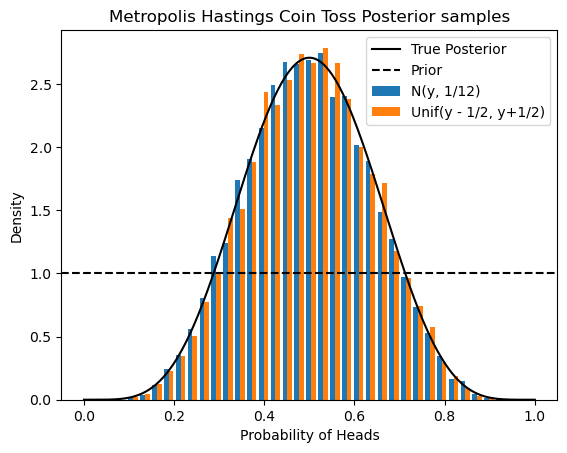

In [41]:
x_vals = np.linspace(0, 1, 400)
true_posterior = beta.pdf(x_vals, 1 + heads, 1 + tosses - heads)

plt.plot(x_vals, true_posterior, label="True Posterior", color="black")
plt.axhline(y=1, color="black", linestyle="dashed", label="Prior")
plt.hist(mh_df, bins=33, density=True, label = list(mh_df.columns))
plt.title("Metropolis Hastings Coin Toss Posterior samples")
plt.xlabel("Probability of Heads")
plt.ylabel("Density")
plt.legend()
plt.savefig("C:/Users/jckricket/Dropbox/Apps/Overleaf/M_Scimat_Thesis/images/coin_MH_Python.pdf")
plt.show()